##Luis David Pardo Pedraza

##Sentiment analysis for the Hotel Industry

Fictional case study with real data. Main focus is the usage of NLP techniques to build a sentiment analysis model.

##Business problem

This notebook aims to give useful insights to a new entrant company in the global hotel market named New Horizons Hotels, that hired me for a data scientist position.

To begin with, the hotel industry depends significantly on customer feedback to assess service quality and identify areas of improvement. Hotel chains and hospitality management companies receive thousands of reviews daily on platforms like Trip Advisor. Manually analyzing these reviews to understand customer satisfaction and address issues is time-consuming and often impractical.

For this reason, companies from this industry require an efficient method to automatically predict the ratings of customer reviews. This approach enables them to quickly identify and assess dissatisfied customers, enhancing overall satisfaction and loyalty. Additionally, it allows for more effective resource allocation by prioritizing actions based on review ratings.

Therefore, the main idea is to build a NLP pipeline that can classify reviews in Negative, Neutral, and Positive categories. With this, the company can gain immediate insights into overall customer sentiments towards various aspects of hotel industry, such as service, cleanliness, amenities, and value for money. This categorization allows for quick action on feedback, prioritizing critical issues that might discourage or affect negatively future customers. This pipeline will be specially useful to a new company like New Horizon Hotels, since we can enter into the market using the best practices and avoiding potential problems from the start.

###Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

##Data acquisition

For the sake of this study, a dataset containing valuable information of the Hotel industry will be used.

For acquiring this dataset I am searching on the Kaggle website for hotel related data.

After browsing on the website I found a dataset with relevan information for this task. The chosen dataset is called "Trip Advisor Hotel Reviews" and can be found on the following URL:

https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

This dataset shows reviews from hotel customers in the famous rating platform Trip Advisor.

This analysis will be conducted with the programming language Python within Google Colab.

###Accessing and loading the data

In order to access and load the data, the following steps will be performed:

1. Click the link of the dataset
2. Download the dataset to my computer and save it with the name "tripadvisor_hotel_reviews.csv".
3. Upload the "tripadvisor_hotel_reviews.csv" file to the File Explorer specifically to the "content/sample_data" directory.
4. Use the "read_csv()" function of pandas to read the dataset.
5. Assign the new DataFrame to a variable "data"

In [4]:
data = pd.read_csv(r"C:\Users\luisd\OneDrive\Desktop\Python_projects\Datasets\tripadvisor_hotel_reviews.csv")

##Data exploration

###Data shape and general information

I begin by addressing the size and shape of the dataset:

With "data.shape" the form of the dataset is described giving the number of rows and columns in it.

"print()" allows to see inputs of the function. In this case a title text "Shape of the Dataframe:" and the actual shape.

".head(1)" function is used to display all the columns of the dataframe with the first row.

In [5]:
print("Shape of the Dataframe:", data.shape)

data.head(2)

Shape of the Dataframe: (20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


As can be observed, the dataset has 20491 rows and just 2 columns. Each row is a review from one customer. The two columns are the features "Review" and "Rating".

According the information above the next few insights can be said from the dataset:

"Review" presents object type data which makes sense because this feature contains the text describing the customer experience in a hotel. This is the feature I want to analyze with the model.

"Rating" is variable that contains only integer numbers as values. This is due, that TripAdvisor uses a bubble rating system that oscillates from 1 (Terrible) to 5 (Excellent) to evaluate the experience of a cutomer regarding hotels, restaurants and tourist attractions. This variable is fundamental for the pipeline because from this variable I am building a new sentiment variable which will be the target variable for this study.

###Construction of the target variable "Sentiment"

To justify the decision of creating the new target variable "Sentiment" the next assumptions are made:

-Reviews with low "Rating" (1 and 2) reflect a bad experience and therefore involve negative feelings, thoughts or emotions so they will be grouped in a "Negative" category.

-Reviews with medium "Rating" (3) reflect an average experience that met expectations but did not significantly exceed or fail to meet them and therefore involve neutral perceptions feelings, thoughts or emotions so they will be grouped in a "Neutral" category.

-Reviews with high "Rating" (4 and 5) reflect a good experience and therefore involve positive feelings, thoughts or emotions so they will be grouped in a "Positive" category.

With this in mind, the target variable "Sentiment" is created.

Moreover, the original "Rating" variable is deleted to avoid leakage

In [7]:
def categorize_rating(Rating):
    if Rating in [1, 2]:
        return 'Negative'
    elif Rating == 3:
        return 'Neutral'
    elif Rating in [4, 5]:
        return 'Positive'

data["Sentiment"] = data["Rating"].apply(categorize_rating)
data = data.drop(columns=['Rating'])
print(data.head())

                                              Review Sentiment
0  nice hotel expensive parking got good deal sta...  Positive
1  ok nothing special charge diamond member hilto...  Negative
2  nice rooms not 4* experience hotel monaco seat...   Neutral
3  unique, great stay, wonderful time hotel monac...  Positive
4  great stay great stay, went seahawk game aweso...  Positive


###Distribution of Sentiments

Now let's dive into seeing the distribution of the target variable for this study, the "Sentiment". For doing so, a bar chart is constructed.

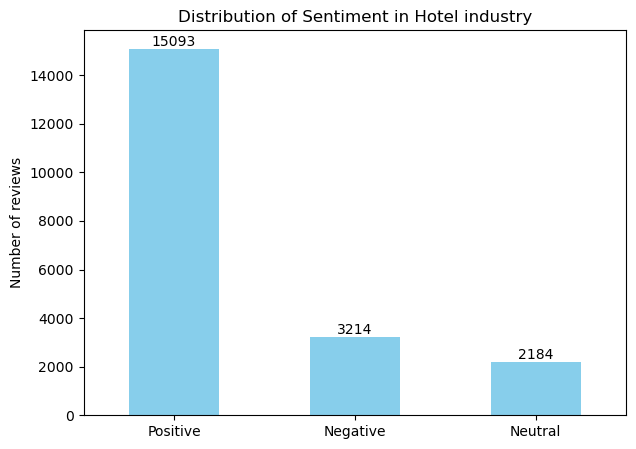

In [8]:
plt.figure(figsize=(7, 5))
value_counts = data["Sentiment"].value_counts()

bars = value_counts.plot(kind="bar", color="skyblue")

for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, str(count), ha="center", va="bottom")

plt.ylabel("Number of reviews")
plt.title("Distribution of Sentiment in Hotel industry")
plt.xticks(rotation=0)
plt.show()

According to the chart above, most of the reviews (15093 of 20491) relate to a positive experience. This means that people usually left positive reviews for the hotels they had experience with. On the opposite note, just over 3000 reviews were negative adding the 1 and 2 rating reviews. Neutral reviews are even less with an amount of only 2184.

Indeed the chart clearly depicts that the dataset is unbalanced among positive reviews, neutral and negative reviews so this is an issue to consider in further steps.

Now the "Sentiment" values are encoded. "0" is the code for Negative, "1" for Neutral and "2" for Positive. A variable "Sentiment_Code" is created. This is the target variable encoded.

In [9]:
data["Sentiment"] = data["Sentiment"].astype("category")
data["Sentiment_Code"] = data["Sentiment"].cat.codes

##Data preprocessing

###Missing values

In [10]:
print("Number of missing values:")

data.isna().sum().sum()

Number of missing values:


0

After using code to look for missing values it is found that in this dataset there are not missing values.

###Duplicate values

In [11]:
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
print("Shape of the Dataframe of duplicated rows:", duplicated_rows.shape)

Shape of the Dataframe of duplicated rows: (0, 3)


There are not duplicate values which is good because this helps to avoid bias and ambiguity in further analysis.

###Text cleanup

For cleaning the text data some cleaning techniques are used:

Lowercasing: makes all words to be formed by lowercase letters.

Tokenizing: Tokenizes the text into words using a regular expression tokenizer. For example, "This is a cat." would be tokenized into ["this", "is", "a", "cat"].

Porter stemmer: a famous stemmer algorithm that reduces words to their base or root form. For example, the words "swimming", "swimmer", and "swam" are all reduced to "swim".

Joins words: combines the list of stemmed words into a single string, with each word separated by a space. This approach avoids having extra white spaces.

All of these techniques are placed into a function "preprocessor_of_text". Afterwards, the new function is applied to the column "Review" which is the one that contains the string data.

In [12]:
def preprocessor_of_text(text):
  text = text.lower()
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  words = tokenizer.tokenize(text)
  porter_stemmer = nltk.stem.porter.PorterStemmer()
  stemmed_words = [porter_stemmer.stem(w) for w in words] #Applies the the Porter stemmer algorithm to the input text
  return " ".join(stemmed_words) #joins the stemmmed words into a single string. Words are separated only with one white space.

data["preprocessed_text"] = data["Review"].apply(preprocessor_of_text)

data.head()

,Review,Sentiment,Sentiment_Code,preprocessed_text
0,nice hotel expensive parking got good deal sta...,Positive,2,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,Negative,0,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,Neutral,1,nice room not 4 experi hotel monaco seattl goo...
3,"unique, great stay, wonderful time hotel monac...",Positive,2,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",Positive,2,great stay great stay went seahawk game awesom...


###Drop non numerical features that are not used in training

Now the non numerical variables "Review: and "Sentiment" are removed from the dataset. This helps to prevent leakage and also redundancy since their content is direclty related to other features "preprocessed_text" and "Sentiment_Code" respectively.

However the relation between Sentiment and Sentiment_Code is stored in a variable called "class_labels" in orther to revert to the original values after training the model.

In [13]:
class_labels = data['Sentiment'].cat.categories
data = data.drop(columns=["Review", "Sentiment"])

##Spliting the dataset

The data is split in three sets (train, validation and test). 20% of it is for testing. The remaining 80% is split again into training and validation. 25% of the reimaning data is split for validation. A random_state value is fixed to ensure reproducibility, so every time the code is run the same split will be generated.

(X) contains the preprocessed text data which is used as input features for the model.
(y) contains the sentiment labels encoded as numerical values which is used as the target variable for the model.

In [14]:
X_temp, X_test, y_temp, y_test = train_test_split(data["preprocessed_text"], data["Sentiment_Code"], test_size=0.2, random_state=44)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=44)

##Feature engineering

###Converting text data into numercial data (TF-IDF)

Now it is time to convert the text data into numerical features that can be used for machine learning purposes.

For doing so, the TF-IDF (Term Frequency-Inverse Document Frequency) method is used. Basically, this quantifies the importance of a given word relative to other words in a document and in the corpus. The importance increases proportionally to the number of times a word appears in a document but is evaluated also by the number of documents in the corpus that contain that word.

In [15]:
vectorizer = TfidfVectorizer(min_df=5)#min_df=5, makes that terms that appear in fewer than 5 documents are ignored. Reduces noise
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train).toarray()
X_val = vectorizer.transform(X_val).toarray()
X_test = vectorizer.transform(X_test).toarray()

print("new_X_train", X_train.shape)
print("new_X_val", X_val.shape)
print("new_X_test", X_test.shape)

new_X_train (12294, 8007)
new_X_val (4098, 8007)
new_X_test (4099, 8007)


The information above shows the shape of the new matrixes created for X_train and X_test.
Each row is still one review and the 8007 columns correspond to all the unique terms that meet the min_df=5 criteria.

###Balancing the train dataset (SMOTE)

As mentioned before, the dataset is not balanced among Positive, Neutral and Negative reviews. For balancing the dataset the SMOTE technique is applied on the training set. This approach generates synthetic samples for the minority classes (Neutral and Negative, in this case)

In [16]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [17]:
unique, counts = np.unique(y_train_res, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Class distribution after SMOTE:", class_counts)

Class distribution after SMOTE: {0: 9037, 1: 9037, 2: 9037}


##Model building and training

###Training a model and selecting an algorithm

For selecting an algorithm, I am defining a function that trains and evaluates models. For training I am using three common classifier algorithms being: Logistic Regression, Decision Tree, and Random Forest. The model with better performance out of the three will be selected.

To assess the performance of the models, I am using 4 different metrics: Accuracy, Precision, Recall and F1 score. Each one has its own benefits but the most important one for this case would be F1-score. The reason behind this is that, this study is a sentiment analysis case. In this type of analysis, Both false positives (incorrectly classifying positive sentiment) and false negatives (missing actual positive sentiment) are important to avoid to ensure user satisfaction and accurate sentiment understanding. F1-score provides a balance between precision and recall, for that reason I consider this as the main metric for selecting an algorithm.

For this part I define a function to train and evaluate each model using the validation set. I construct to dictionaries to be applied, one for storing results and the second one for algorithms. Then I use a loop that iterates over each algorithm and calls the defined function to train and evaluate each algorythm using the 4 selected metrics.

In [18]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average="weighted")
    recall = recall_score(y_val, y_pred, average="weighted")
    f1 = f1_score(y_val, y_pred, average="weighted")
    return accuracy, precision, recall, f1

results = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=44),
    "Decision Tree": DecisionTreeClassifier(random_state=44),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=44),
}

for name, model in algorithms.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_res, y_train_res, X_val, y_val)
    results["Algorithm"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

In [19]:
results_df = pd.DataFrame(results) #DataFrame that contains the results of the models
print(results_df)

             Algorithm  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.827233   0.849049  0.827233  0.836573
1        Decision Tree  0.677404   0.722839  0.677404  0.696657
2        Random Forest  0.789653   0.745607  0.789653  0.762072


After training and evaluating the models, the Logistic Regression algorithm is found to be the best for this dataset. The F1 Score for this is near 84% which is considerably higher than the second best model Random Forest (with a F1 score of 76%). Additionally, Logistic Regression got the best Accuracy, Precision and Recall among the three models. Moreover, this is a fast algorithm to train. For all these reasons Logistic Regression is selected as the best model for this case.

###Hyperparameter tuning

####Finding the best parameters

In order to improve the results for the Logistic regression model a technique for hyperparameter tuning is conducted. The selected technique is K-Fold Cross validation. With this approach the set of data is randomly divided into k-folds of approximately equal size.

For this case, the data is divided into 5 folds (which is the value of k) for cross-validation. Each time, the model is trained on 4 folds (training set) and evaluated on the remaining fold (validation set). This process is repeated 5 times, using a different fold for validation each time.

In [20]:
param_grid = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear"],
    "max_iter": [100, 200, 500]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=44)
grid_search = GridSearchCV(LogisticRegression(random_state=44), param_grid, cv=cv, scoring='f1_weighted') #F1 score is selected for choosing the best parameters
grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


The best combination of hyperparameters found by GridSearchCV during the cross-validation process for the Logistic Regression model is presented above. The high regularization strength value (C=10) means that the model performs better with less regularization for this context.

Also, 100 iterations are great for this case because, they were sufficient to find optimal solutions and they are also less time consumming than higher amounts of iterations. On the other hand less iterations present problems while running the code.

The liblinear solver proved to be very suitable for this specific case because the results are good and the computing time was way lower than when I tried with "saga" or "lbfgs" as second solvers.

####Applying the best parameters for validation

In [21]:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("\nBest Logistic Regression model performance on validation set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")


Best Logistic Regression model performance on validation set:
Accuracy: 0.8197
Precision: 0.8310
Recall: 0.8197
F1 Score: 0.8249


##Evaluating the best model

Now it is time to evaluate the best model found with the 4 selected metrics but focusing mainly on the F1 score metric for the reasons stated before in the "Training a model and selecting an algorithm" step. Here is where the model is evaluated on the test set.

###Best model results

In [22]:
y_pred = best_model.predict(X_test)
accuracy, precision, recall, f1 = evaluate_model(best_model, X_train_res, y_train_res, X_test, y_test)

print("\nBest Logistic Regression model performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best Logistic Regression model performance:
Accuracy: 0.8348
Precision: 0.8385
Recall: 0.8348
F1 Score: 0.8366


The information above shows the best results found after using the best parameters provided by the K-fold Cross Validation approach. With this, it can be said that the general performance of the model is great since the most important metric for this case, F1 score is roughly to 84%. Aditionally, all the other three metrics are still above the 80%.

Additionally, in relation to the validation results, all four metrics improved.

So, it can be said that the best model has great performance in predicting the Sentiment of a customer from a text review which is the main objective of this study.

###Match the encoded predictions with their original category labels

This makes that "0", "1", and "2" are marked again as Negative, Neutral and Positive.

In [23]:
y_test_labels = [class_labels[i] for i in y_test]
y_pred_labels = [class_labels[i] for i in y_pred]

###Confusion Matrix

The following matrix shows how good is the model atpredicting examples belonging to the three different classes.

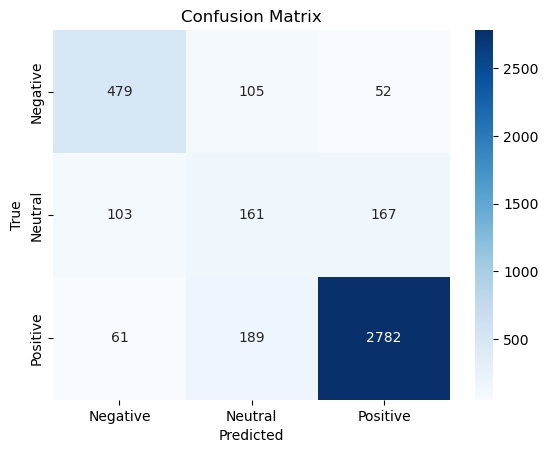

In [24]:
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

According to the chart above, the model is very good at predicting Positive sentiment from reviews and quite good to do so for Negative sentiments. However, the model still struggles considerably to classificate Neutral sentiment from reviews.

###Classification Report

In [25]:
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.75      0.75       636
     Neutral       0.35      0.37      0.36       431
    Positive       0.93      0.92      0.92      3032

    accuracy                           0.83      4099
   macro avg       0.68      0.68      0.68      4099
weighted avg       0.84      0.83      0.84      4099



Regarding the classification report, it is evident what the confusion matrix showed. The model has an easy time when predicting positive sentiments from reviews (F1 score of 92%). In the case of Negative sentiments the model does not perform as well as with the previous category but still manages to deliver a great level of performance (F1 score of 75%).

On an opposite note, there is room for improvement specially in the Neutral sentiments prediction since the F1 score of the model in this category is just a 36%.

##Importance analysis

Let's look at the most important features ("terms") in the NLP system. The following graph will show the top 10 terms used in the collection of reviews that were analyzed.

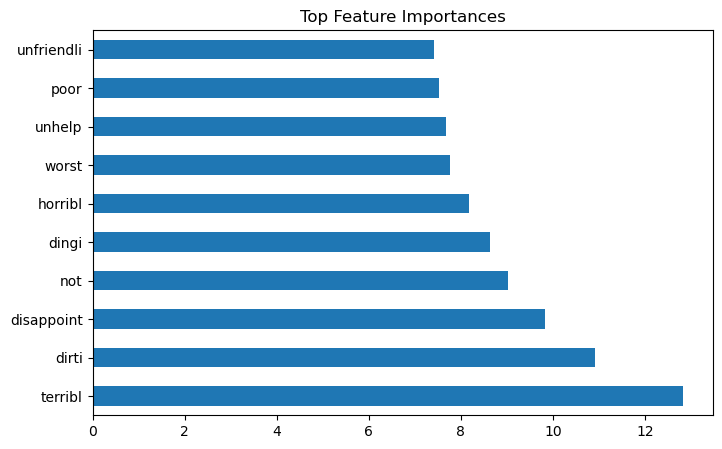

In [26]:
def plot_feature_importance(best_model, feature_names, top_n=10):
    coef = best_model.coef_[0]
    feature_importance = pd.Series(coef, index=feature_names)
    top_features = feature_importance.nlargest(top_n)
    plt.figure(figsize=(8, 5))
    top_features.plot(kind="barh")
    plt.title("Top Feature Importances")
    plt.show()

feature_names = vectorizer.get_feature_names_out().tolist()

plot_feature_importance(best_model, feature_names)

The graph depicts some interesting insights of the NLP system. It turns out that many of the top 10 feautes, in this case words, reflect a negative connotation. For example, words like undfriendli, worst, unhelp, dirti, terribl, and dissappoint usually are used for suggesting negative feelings or thoughts in the hotel industry context. Indeed, terms such as undfriendli and unhelp can be directly related to bad service or unattended requests. Moreover, words like dirti (dirty or dirtiness) or poor can refer to a bad state of the rooms of a hotel.

##Word cloud

The last setp before concluding is visualizing the most important words in this task by using a word cloud.

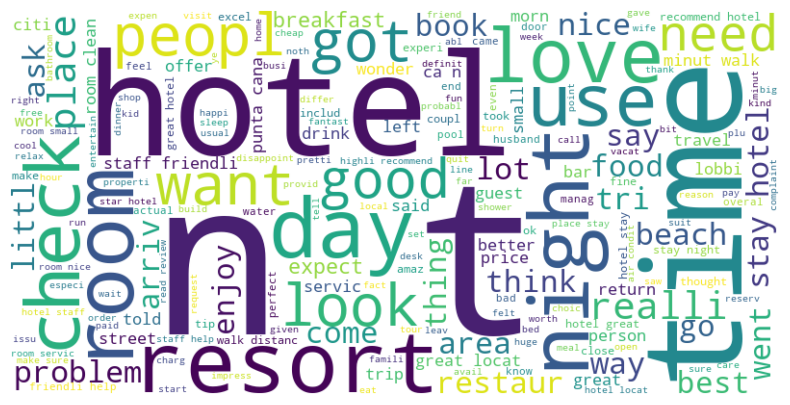

In [27]:
text = " ".join(review for review in data["preprocessed_text"])
wordcloud = WordCloud(width=800, height=400, background_color ="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Final discussion

To conclude, there are a few things that must be said about this pipeline.

In the first place, the pipeline fulfills its purpose since it deals with the business problem in hand with a good performance. As showed by the F1 score of the best model (84%), the NLP system can predict accurately both positive and negative sentiments. For New Horizons Hotels this will be really helpful when trying to enter in the market since the company will know what things produce a negative and work beforehands to avoid this situations. Also, the organization can encourage good practices found in the reviews with positive sentiments. These are the main strenghts of the pipeline, mainly that it can handle the most important categories with a great performace.

On a second note, it must be said that even if the system performs well, there is still room for improvement. Even if it can be argued that the neutral sentiment category is not as important as the negative or positive category, the model had a hard time with the reviews that came from this category. Neutral sentiment reviews were often confused for positive or negative sentiment reviews.

Another potential weakness and very important characteristic to note about the pipeline is that the whole NLP system relies on the assumption that the whole rating mechanic that TripAdvisor uses (evaluating an expereince from 1 to 5) can be directly converted into a sentiment system of "Negative", "Neutral" and "Positive". This assumption makes sense in a lot of cases but not always is going to be that accurate. For example, a customer could have left a review expressing only positive sentiments but still giving a rating of just 3 points for they stay in a hotel. Furthermore, is possible that the model has issues detecting sarcastic reviews (like: "best experience of my life, never coming again").

Finally, for data-driven recommendations I would suggest to try to collect more data that expand the original dataset in order to help the system to improve its overall results, specially those related to neutral sentiment category which is where the model lacks performance. Also is important to note that customer's demands and needs from the hotel industry can change over time so is important to update the dataset with some frequency just for being able to adjust to these new changes. Additionally, I recommend New Horizons Hotels to use the insights delivered by the model to address the negative feelings that customers have with the insudtry. As the top features showed, some of the most frequent concerns are related to bad service or poor state of the rooms.

##References:

Alam, M. H., Ryu, W.-J., Lee, S., (2016) Trip Advisor Hotel Reviews. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sci- ences 339, 206–223. Available at: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews. (Accessed: 16 June 2024)

